# Income

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

Clean up the csv

In [81]:
income = pd.read_csv('../Data/HDPulse_data_export.csv', skiprows = 3, skipfooter = 8)

/var/folders/w2/vspf2xks0vj7x2vwsrfjnszh0000gp/T/ipykernel_1906/1767880313.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  income = pd.read_csv('../Data/HDPulse_data_export.csv', skiprows = 3, skipfooter = 8)


In [82]:
income.head()

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
0,United States,0,"78,538",NaN
1,Virginia,51000,"90,974",12 of 52
2,Norton City,51720,"38,497","3,071"
3,Galax City,51640,"41,438","3,022"
4,Buchanan County,51027,"42,216","2,997"


In [83]:
income = income.drop([0,1])
income

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties)
2,Norton City,51720,"38,497","3,071"
3,Galax City,51640,"41,438","3,022"
4,Buchanan County,51027,"42,216","2,997"
5,Lee County,51105,"42,269","2,993"
6,Martinsville City,51690,"42,434","2,988"
...,...,...,...,...
130,Stafford County,51179,"133,792",18
131,Arlington County,51013,"140,160",12
132,Fairfax County,51059,"150,113",5
133,Falls Church City,51610,"154,734",4


In [84]:
alleghany = income.loc[income['County'] == 'Alleghany County and Clifton Forge City']
bedford = income.loc[income['County'] == 'Bedford City and County']
halifax = income.loc[income['County'] == 'Halifax County with South Boston City']

print(alleghany)
print(bedford)
print(halifax)

                                     County   FIPS Value (Dollars)  \
33  Alleghany County and Clifton Forge City  51005          55,160   

   Rank within US (of 3141 counties)  
33                             2,345  
                     County   FIPS Value (Dollars)  \
86  Bedford City and County  51917          77,644   

   Rank within US (of 3141 counties)  
86                               595  
                                   County   FIPS Value (Dollars)  \
19  Halifax County with South Boston City  51083          49,244   

   Rank within US (of 3141 counties)  
19                             2,731  


In [85]:
alleghany_row = alleghany.iloc[0].copy()

alleghany_county = alleghany_row.copy()
alleghany_county['County'] = 'Alleghany County'

clifton_forge = alleghany_row.copy()
clifton_forge['County'] = 'Clifton Forge City'

In [86]:
bedford_row = bedford.iloc[0].copy()

beford_county = bedford_row.copy()
beford_county['County'] = 'Bedford County'

beford_city = bedford_row.copy()
beford_city['County'] = 'Bedford City'

In [87]:
halifax_row = halifax.iloc[0].copy()

halifax_county = halifax_row.copy()
halifax_county['County'] = 'Halifax County'

south_boston = bedford_row.copy()
south_boston['County'] = 'South Boston City'

In [88]:
income = income.drop([alleghany.index[0], bedford.index[0], halifax.index[0]])
new_rows = pd.DataFrame([alleghany_county, clifton_forge, beford_county, beford_city, halifax_county, south_boston])

income = pd.concat([income, new_rows], ignore_index=True)

In [89]:
gdf = gpd.read_file('../Data/VA_Jurisdictions/VA_Jurisdictions.shp')
gdf.head()

,OBJECTID,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,AREASQMI,LASTUPDATE,JURISTYPE,STCOFIPS,...,CODE_DISTR,DISTRICT,CLASS_FP,VDOT_CODE,JURIS_CODE,RNS_FIPS_C,AMS_FIPS_C,Shape__Are,Shape__Len,geometry
0,1,1674630,Montgomery,Montgomery County,L,Y,614.317200,2021-09-23,CO,51121,...,2,Salem,H1,060,060,060,121,1.591074e+09,238285.910698,"MULTIPOLYGON (((-8941584.662 4490539.094, -894..."
1,2,1497573,Russell,Russell County,V,N,747.130895,2014-09-24,CO,51167,...,1,Bristol,H1,083,083,083,167,1.935060e+09,250387.957924,"POLYGON ((-9103768.661 4433341.817, -9103809.2..."
2,3,1502770,Henry,Henry County,T,N,598.833273,2021-09-23,CO,51089,...,2,Salem,H1,044,044,044,089,1.550971e+09,227443.648406,"POLYGON ((-8866137.692 4416041.284, -8866198.0..."
3,4,1480136,King and Queen,King and Queen County,T,N,522.488044,2017-06-23,CO,51097,...,6,Fredericksburg,H1,049,049,049,097,1.353238e+09,298730.097281,"POLYGON ((-8533092.708 4523518.287, -8533094.4..."
4,5,1494354,Floyd,Floyd County,V,N,598.554777,2021-09-23,CO,51063,...,2,Salem,H1,031,031,031,063,1.550250e+09,234994.467427,"POLYGON ((-8919821.406 4456253.01, -8919740.25..."


In [90]:
def clean_name(name):
    name = name.lower()
    name = name.replace('city of ', '')
    name = name.replace('city', '')
    name = name.replace('town of ', '')
    name = name.replace('town', '')
    return name

income['County'] = income['County'].apply(clean_name)
gdf['NAMELSAD'] = gdf['NAMELSAD'].apply(clean_name)

In [91]:
merged_gdf = income.merge(gdf, left_on="County", right_on="NAMELSAD", how="right")
merged_gdf = merged_gdf.dropna(subset=['County'])
merged_gdf

,County,FIPS,Value (Dollars),Rank within US (of 3141 counties),OBJECTID,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,...,CODE_DISTR,DISTRICT,CLASS_FP,VDOT_CODE,JURIS_CODE,RNS_FIPS_C,AMS_FIPS_C,Shape__Are,Shape__Len,geometry
0,montgomery county,51121.0,"70,769",995,1,1674630,Montgomery,montgomery county,L,Y,...,2,Salem,H1,060,060,060,121,1.591074e+09,238285.910698,"MULTIPOLYGON (((-8941584.662 4490539.094, -894..."
1,russell county,51167.0,"49,020","2,746",2,1497573,Russell,russell county,V,N,...,1,Bristol,H1,083,083,083,167,1.935060e+09,250387.957924,"POLYGON ((-9103768.661 4433341.817, -9103809.2..."
2,henry county,51089.0,"48,445","2,769",3,1502770,Henry,henry county,T,N,...,2,Salem,H1,044,044,044,089,1.550971e+09,227443.648406,"POLYGON ((-8866137.692 4416041.284, -8866198.0..."
3,king and queen county,51097.0,"72,851",831,4,1480136,King and Queen,king and queen county,T,N,...,6,Fredericksburg,H1,049,049,049,097,1.353238e+09,298730.097281,"POLYGON ((-8533092.708 4523518.287, -8533094.4..."
4,floyd county,51063.0,"61,401","1,774",5,1494354,Floyd,floyd county,V,N,...,2,Salem,H1,031,031,031,063,1.550250e+09,234994.467427,"POLYGON ((-8919821.406 4456253.01, -8919740.25..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,goochland county,51075.0,"118,695",49,132,1674271,Goochland,goochland county,L,Y,...,4,Richmond,H1,037,037,037,075,1.204904e+09,214765.311631,"POLYGON ((-8689152.949 4565886.216, -8689108.7..."
132,franklin county,51067.0,"68,348","1,176",133,1494434,Franklin,franklin county,V,Y,...,2,Salem,H1,033,033,033,067,2.894287e+09,295526.063820,"POLYGON ((-8931770.106 4421298.314, -8931384.0..."
245,clifton forge,51005.0,"55,160","2,345",246,2390804,Clifton Forge,clifton forge,L,Y,...,8,Staunton,C1,105,105,105,493,1.279810e+07,22903.240602,"POLYGON ((-8886298.659 4557202.864, -8886213.0..."
298,south boston,51917.0,"77,644",595,299,2391421,South Boston,south boston,L,Y,...,3,Lynchburg,C1,130,130,130,492,5.279044e+07,46005.512580,"POLYGON ((-8784747.864 4402996.504, -8784505.9..."


In [92]:
merged_gdf['Value (Dollars)'] = merged_gdf['Value (Dollars)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
merged_gdf['Value (Dollars)']

0       70769.0
1       49020.0
2       48445.0
3       72851.0
4       61401.0
         ...   
131    118695.0
132     68348.0
245     55160.0
298     77644.0
315     77644.0
Name: Value (Dollars), Length: 136, dtype: float64

In [93]:
merged_gdf = gpd.GeoDataFrame(merged_gdf, geometry="geometry", crs=gdf.crs)

<Axes: >

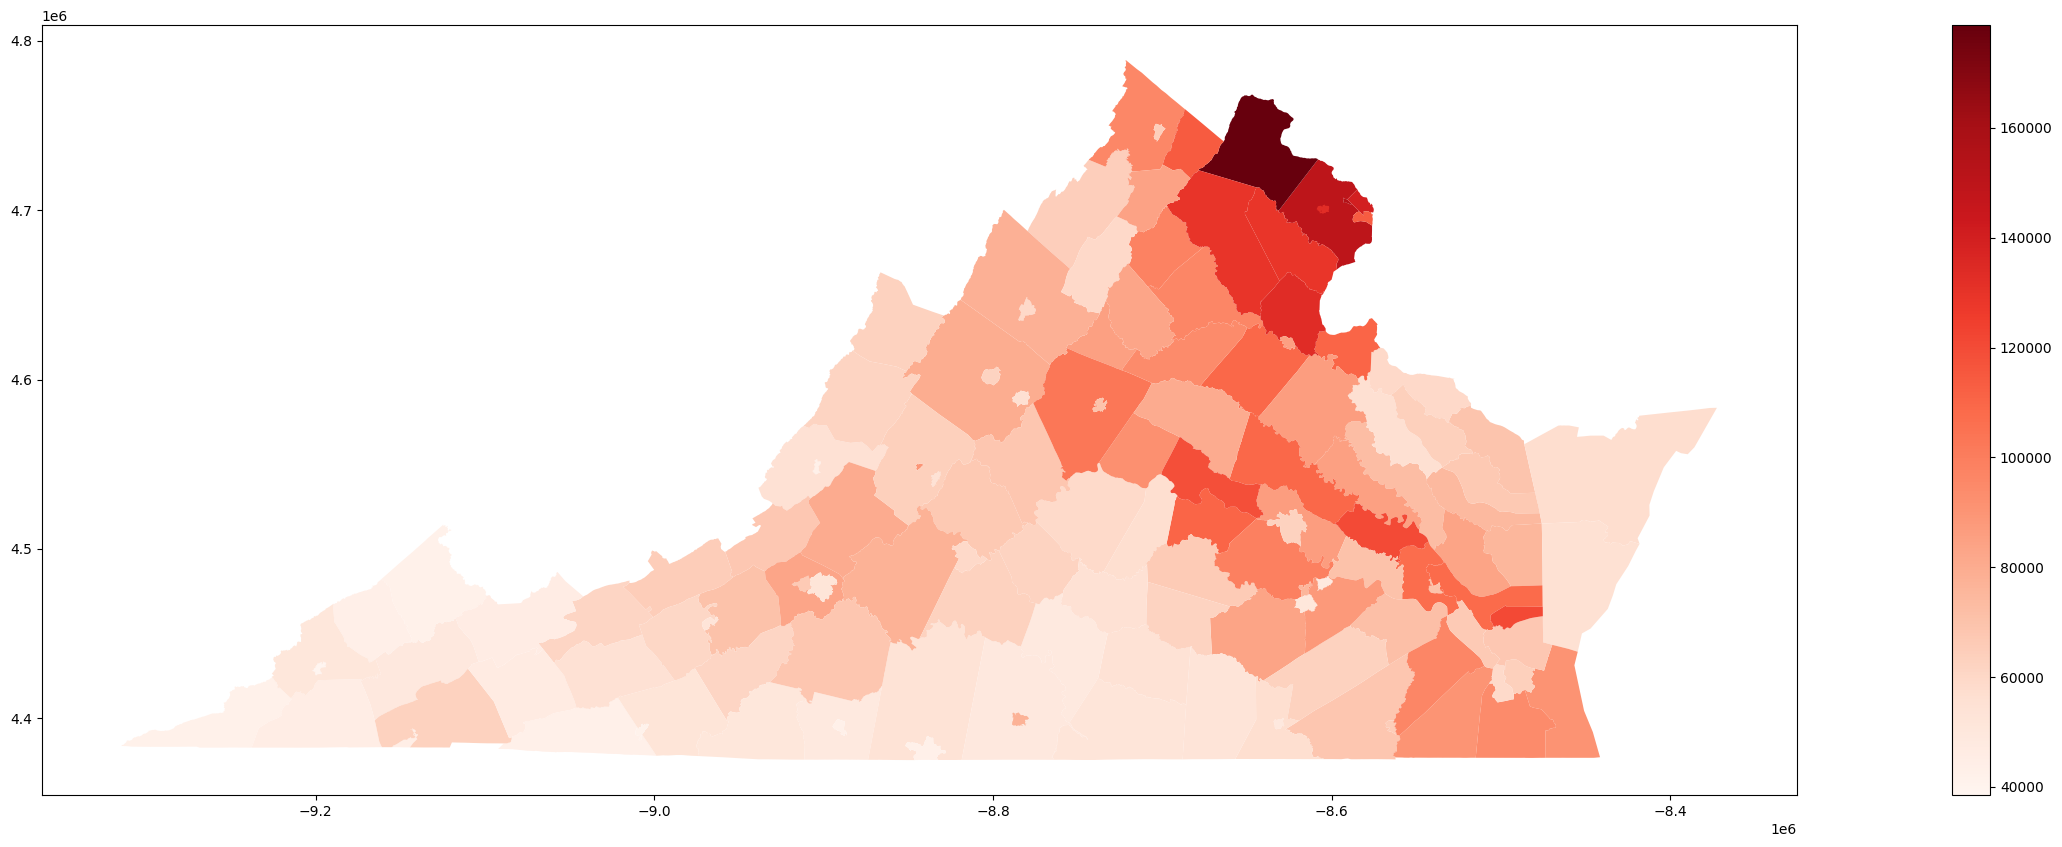

In [96]:
fig, ax = plt.subplots(figsize=(40, 10))
merged_gdf.plot(
    column='Value (Dollars)',
    cmap='Reds',
    legend=True,
    #edgecolor='black',
    scheme = None,
    ax=ax
)